# Standard imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Boston Dataset

## Exploratory Data Analysis

### Storing and reading the data

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
boston_data = pd.read_csv('boston_housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
boston_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [6]:
boston_data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Representing initial data

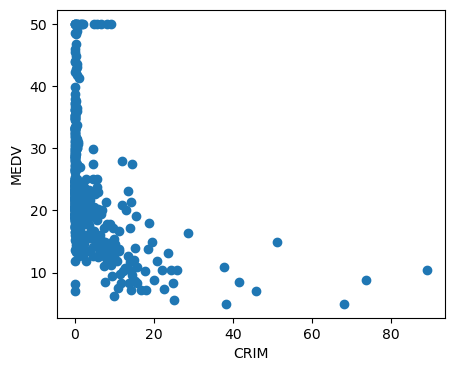

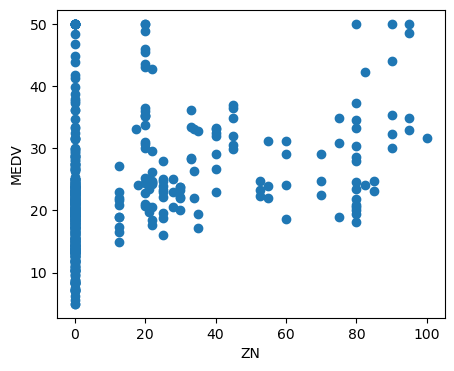

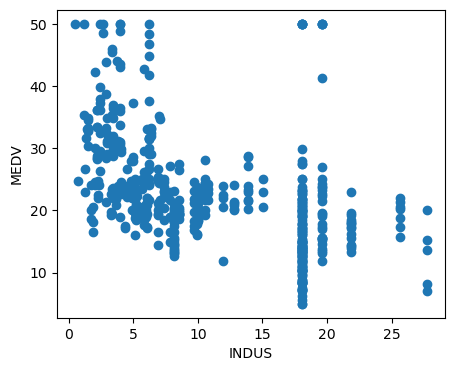

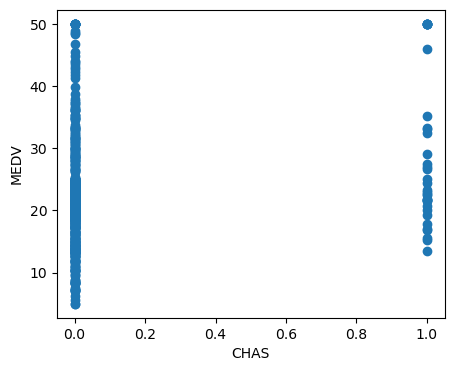

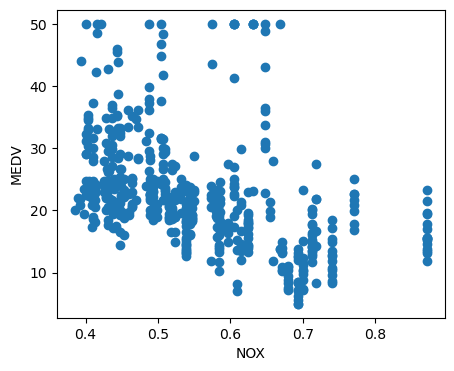

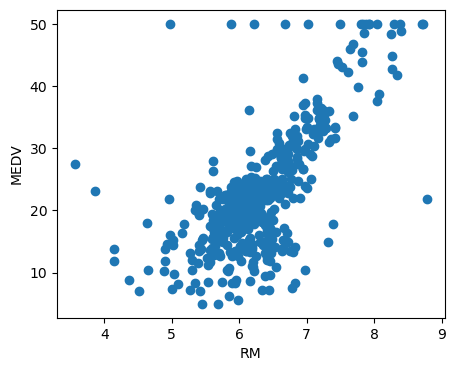

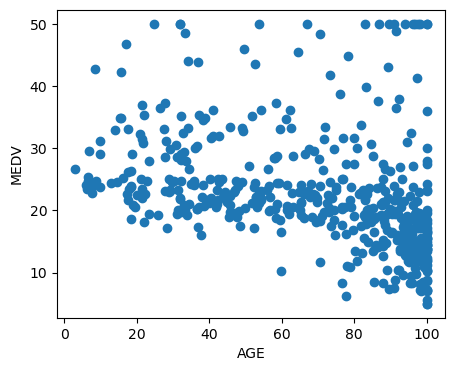

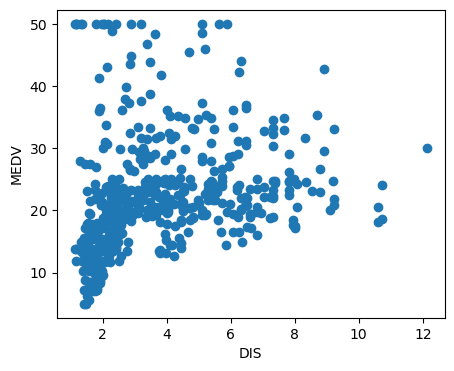

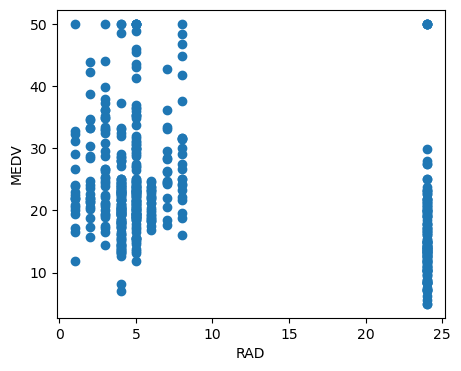

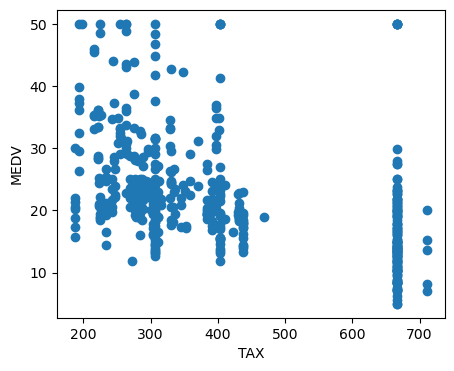

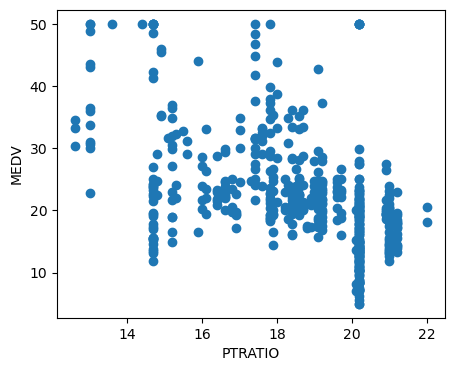

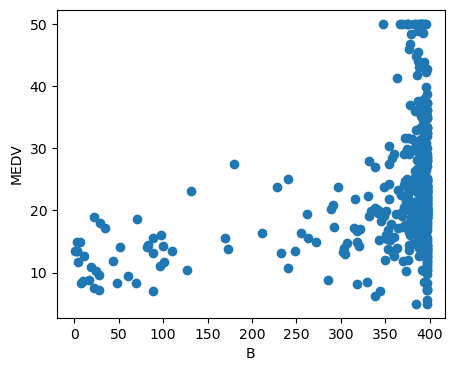

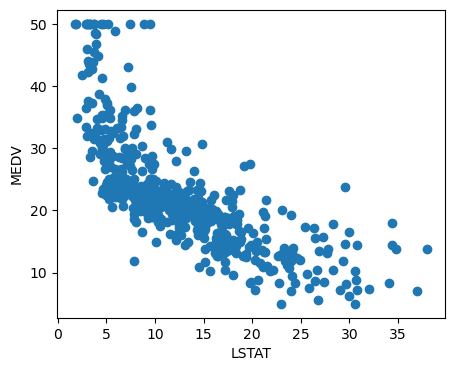

In [46]:
for feature in column_names:
    if feature != 'MEDV':
        plt.figure(figsize=(5, 4));
        plt.scatter(boston_data[feature], boston_data['MEDV']);
        plt.ylabel('MEDV');
        plt.xlabel(feature);
    plt.show();

### Separating the data into two separate tables to show the target column

In [8]:
X_boston = boston_data.drop('MEDV', axis=1)
y_boston = boston_data['MEDV']

## Feature Scaling and PCA

In [9]:
X_boston = StandardScaler().fit_transform(X_boston)
pca = PCA(n_components=None)

X_pca = pca.fit_transform(X_boston)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_boston)
explained_variance = pca.explained_variance_ratio_
print(sum(explained_variance))

[0.47129606 0.11025193 0.0955859  0.06596732 0.06421661 0.05056978
 0.04118124 0.03046902 0.02130333 0.01694137 0.0143088  0.01302331
 0.00488533]
0.8073178205045917


### Testing and Training the data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_boston, test_size=0.2, random_state=20)
print('Training Shape: ',X_train.shape)
print('Testing  Shape: ',X_test.shape)

Training Shape:  (404, 5)
Testing  Shape:  (102, 5)


## Evaluation Score Function

In [11]:
def eval(y_test, predictions, results=[]):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions) * 100
    results = [mae, rmse, r2]
    print("Mean Absolute Error: ", round(mae, 5))
    print("Root Mean Squared Error: ", round(rmse, 5))
    print("R-squared (R2) Score:", round(r2, 5))
    return results

## Performing Linear Regression

### Model fitting and predictions

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Training R^2 Score:", train_score)
print("Testing R^2 Score:", test_score)

Training R^2 Score: 0.6939694417071216
Testing R^2 Score: 0.7049638109761753


### Data representation

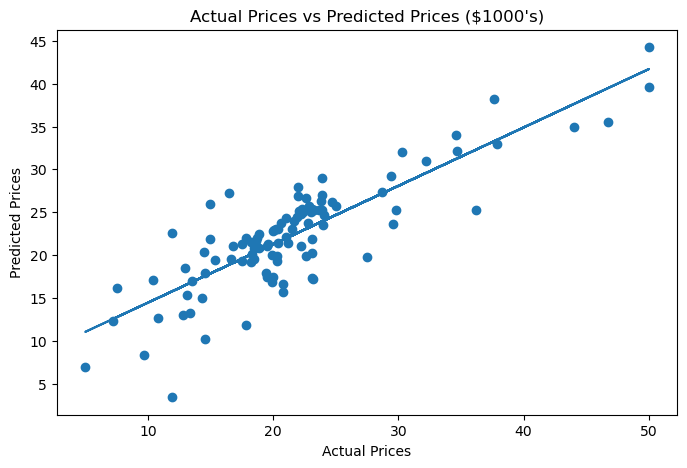

In [13]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test,predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices ($1000's)")
m, b = np.polyfit(y_test, predictions, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

Text(0, 0.5, 'MEDV')

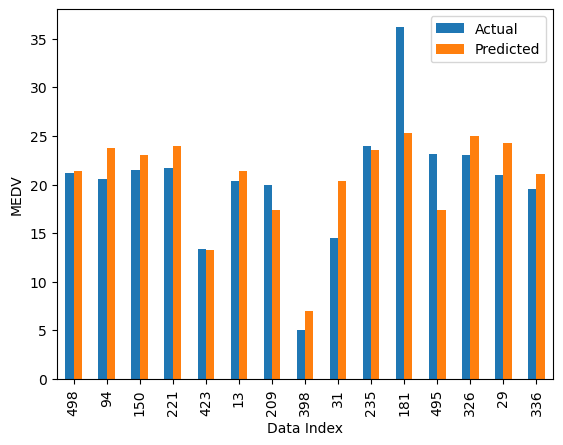

In [14]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result = result.head(15)
result.plot(kind='bar')
plt.xlabel("Data Index")
plt.ylabel("MEDV")

### Model Evaluation

In [15]:
results = []
lm = eval(y_test, predictions, results)

Mean Absolute Error:  3.41996
Root Mean Squared Error:  4.35912
R-squared (R2) Score: 70.49638


## Performing Random Forest

### Model fitting and predictions

In [16]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Training R^2 Score:", train_score)
print("Testing R^2 Score:", test_score)

Training R^2 Score: 0.961419544543688
Testing R^2 Score: 0.7581933060664017


### Data representation

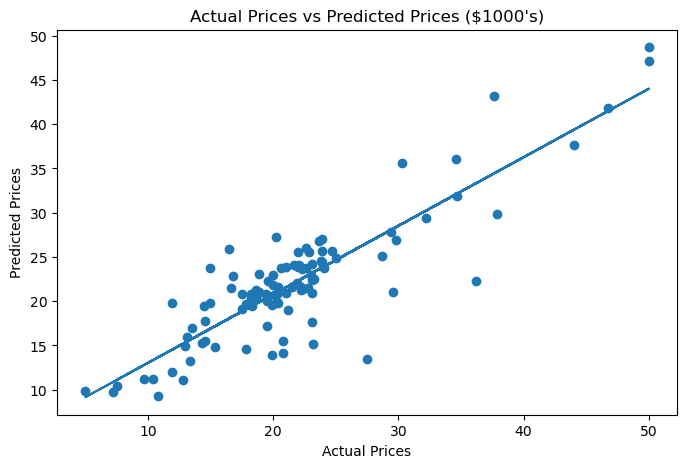

In [17]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test,predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices ($1000's)")
m, b = np.polyfit(y_test, predictions, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

Text(0, 0.5, 'MEDV')

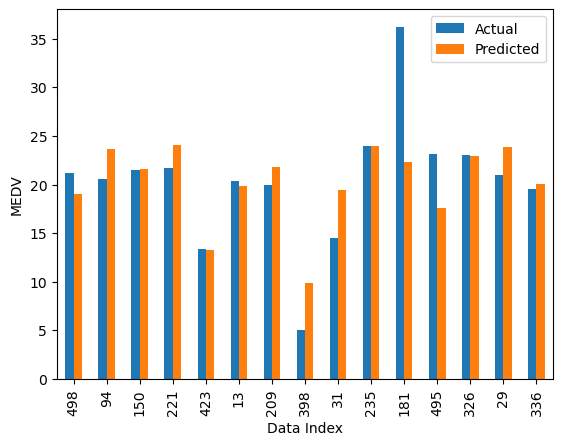

In [18]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result = result.head(15)
result.plot(kind='bar')
plt.xlabel("Data Index")
plt.ylabel("MEDV")

### Model Evaluation

In [19]:
rfr = eval(y_test, predictions, results)

Mean Absolute Error:  2.87787
Root Mean Squared Error:  3.94635
R-squared (R2) Score: 75.81933


We observed a lower RMSE using Random Forest Regressor

## Performing Gradient Boost

### Model fitting and predictions

In [20]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Training R^2 Score:", train_score)
print("Testing R^2 Score:", test_score)

Training R^2 Score: 0.939687168799945
Testing R^2 Score: 0.7066475264664704


### Data representation

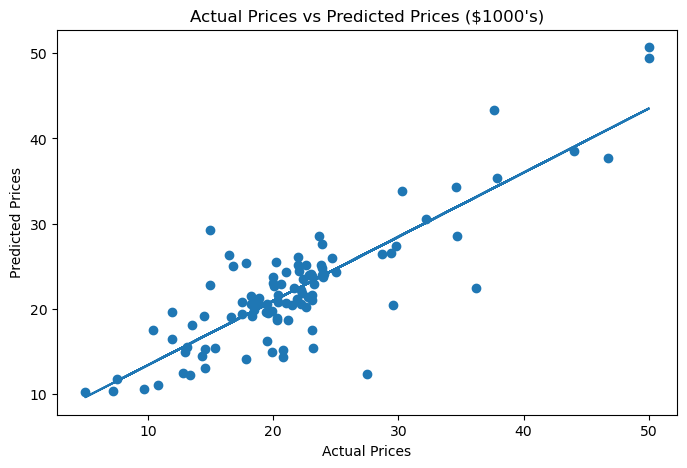

In [21]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test,predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices ($1000's)")
m, b = np.polyfit(y_test, predictions, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

Text(0, 0.5, 'MEDV')

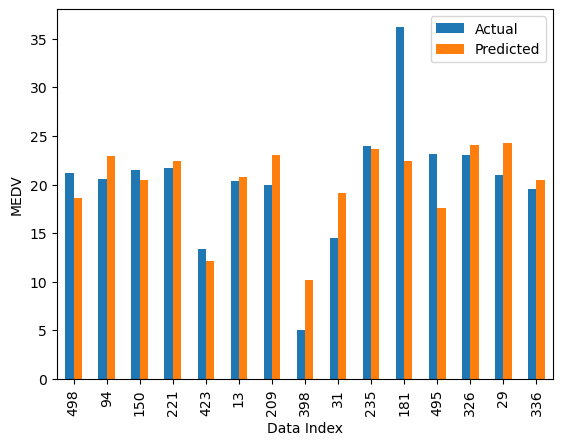

In [22]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result = result.head(15)
result.plot(kind='bar')
plt.xlabel("Data Index")
plt.ylabel("MEDV")

### Calculating Mean Squared Error and Root Mean Squared Error

In [23]:
gbr = eval(y_test, predictions, results)

Mean Absolute Error:  3.08565
Root Mean Squared Error:  4.34666
R-squared (R2) Score: 70.66475


We observed an even lower RMSE using Gradient Boost

## Removing Outliers

### IQR Method

In [24]:
Q1 = boston_data[column_names].quantile(0.25)
Q3 = boston_data[column_names].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (boston_data[column_names] < lower_bound) | (boston_data[column_names] > upper_bound)
boston_data_no_outliers = boston_data[~outliers.any(axis=1)]
print(boston_data_no_outliers.shape)

(268, 14)


In [25]:
X_boston = boston_data_no_outliers.drop('MEDV', axis=1)
y_boston = boston_data_no_outliers['MEDV']

In [26]:
X_boston = StandardScaler().fit_transform(X_boston)
pca = PCA(n_components=None)

X_pca = pca.fit_transform(X_boston)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_boston)
explained_variance = pca.explained_variance_ratio_
print(sum(explained_variance))

[4.17314010e-01 1.52085448e-01 1.04813962e-01 8.27542988e-02
 6.86777336e-02 5.69767746e-02 4.17383940e-02 2.39429755e-02
 1.77274952e-02 1.56668806e-02 1.30571656e-02 5.24486228e-03
 2.33425059e-34]
0.8256454522056565


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_boston, test_size=0.2, random_state=20)
print('Training Shape: ',X_train.shape)
print('Testing  Shape: ',X_test.shape)

Training Shape:  (214, 5)
Testing  Shape:  (54, 5)


In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

lm_iqr = eval(y_test, predictions, results)

Mean Absolute Error:  1.91721
Root Mean Squared Error:  2.49442
R-squared (R2) Score: 65.42431


In [29]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

rfr_iqr = eval(y_test, predictions, results)

Mean Absolute Error:  1.8802
Root Mean Squared Error:  2.59193
R-squared (R2) Score: 62.66835


In [30]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

gbr_iqr = eval(y_test, predictions, results)

Mean Absolute Error:  1.97745
Root Mean Squared Error:  2.64249
R-squared (R2) Score: 61.19782


### Outlier Capping Method

In [31]:
boston_data_no_outliers = boston_data.copy()
for col in column_names:
    boston_data_no_outliers[col] = boston_data[col].clip(lower_bound[col], upper_bound[col])
print(boston_data_no_outliers.shape)

(506, 14)


In [32]:
X_boston = boston_data_no_outliers.drop('MEDV', axis=1)
y_boston = boston_data_no_outliers['MEDV']

In [33]:
X_boston = StandardScaler().fit_transform(X_boston)
pca = PCA(n_components=None)

X_pca = pca.fit_transform(X_boston)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_boston)
explained_variance = pca.explained_variance_ratio_
print(sum(explained_variance))

[5.46669028e-01 1.07559400e-01 9.82781530e-02 7.51201883e-02
 5.32865988e-02 3.31876052e-02 2.60815533e-02 1.80281703e-02
 1.55755729e-02 1.40510093e-02 8.10711915e-03 4.05560210e-03
 2.07217978e-35]
0.8809133677127595


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_boston, test_size=0.2, random_state=20)
print('Training Shape: ',X_train.shape)
print('Testing  Shape: ',X_test.shape)

Training Shape:  (404, 5)
Testing  Shape:  (102, 5)


In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

lm_cap = eval(y_test, predictions, results)

Mean Absolute Error:  3.11333
Root Mean Squared Error:  4.0032
R-squared (R2) Score: 65.2143


In [36]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

rfr_cap = eval(y_test, predictions, results)

Mean Absolute Error:  2.90895
Root Mean Squared Error:  4.20999
R-squared (R2) Score: 61.5277


In [37]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

gbr_cap = eval(y_test, predictions, results)

Mean Absolute Error:  2.83641
Root Mean Squared Error:  4.02304
R-squared (R2) Score: 64.86871


### Z Score Method

In [38]:
boston_data_no_outliers = boston_data.copy()
z_scores = (boston_data[column_names] - boston_data[column_names].mean()) / boston_data[column_names].std()

threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

boston_data_no_outliers = boston_data[~outliers.any(axis=1)]
print(boston_data_no_outliers.shape)

(415, 14)


In [39]:
X_boston = boston_data_no_outliers.drop('MEDV', axis=1)
y_boston = boston_data_no_outliers['MEDV']

In [40]:
X_boston = StandardScaler().fit_transform(X_boston)
pca = PCA(n_components=None)

X_pca = pca.fit_transform(X_boston)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_boston)
explained_variance = pca.explained_variance_ratio_
print(sum(explained_variance))

[4.99833031e-01 1.10771925e-01 9.85260583e-02 8.31328313e-02
 6.10277845e-02 3.73189595e-02 3.50665904e-02 2.11749134e-02
 1.89855647e-02 1.48521665e-02 1.33406612e-02 5.96951372e-03
 8.42978329e-34]
0.8532916305533436


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_boston, test_size=0.2, random_state=20)
print('Training Shape: ',X_train.shape)
print('Testing  Shape: ',X_test.shape)

Training Shape:  (332, 5)
Testing  Shape:  (83, 5)


In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

lm_z = eval(y_test, predictions, results)

Mean Absolute Error:  3.35141
Root Mean Squared Error:  4.33556
R-squared (R2) Score: 73.79358


In [43]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

rfr_z = eval(y_test, predictions, results)

Mean Absolute Error:  2.67663
Root Mean Squared Error:  3.92531
R-squared (R2) Score: 78.51851


In [44]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

gbr_z = eval(y_test, predictions, results)

Mean Absolute Error:  2.90305
Root Mean Squared Error:  4.03931
R-squared (R2) Score: 77.25258


## Hyperparameter Tuning

## Summary

In [45]:
model_metrics_dict = {
    'Linear': lm,
    'Random Forest': rfr,
    'Gradient Boost': gbr,
    'Linear(IQR)': lm_iqr,
    'Random Forest(IQR)': rfr_iqr,
    'Gradient Boost(IQR)': gbr_iqr,
    'Linear(Cap)': lm_cap,
    'Random Forest(Cap)': rfr_cap,
    'Gradient Boost(Cap)': gbr_cap,
    'Linear(Z-Score)': lm_z,
    'Random Forest(Z-Score)': rfr_z,
    'Gradient Boost(Z-Score)': gbr_z
}

# Initialize empty lists for each metric
model_names = []
mae_values = []
rmse_values = []
r2_values = []

# Populate lists with model names and corresponding metrics
for model_name, metrics in model_metrics_dict.items():
    model_names.append(model_name)
    mae_values.append(metrics[0])
    rmse_values.append(metrics[1])
    r2_values.append(metrics[2])

# Create DataFrame with columns for each metric
model_metrics = pd.DataFrame({
    'Model': model_names,
    'MAE': mae_values,
    'RMSE': rmse_values,
    'R2': r2_values
})

# Display the DataFrame
print(model_metrics)

                      Model       MAE      RMSE         R2
0                    Linear  3.419961  4.359121  70.496381
1             Random Forest  2.877873  3.946348  75.819331
2            Gradient Boost  3.085647  4.346665  70.664753
3               Linear(IQR)  1.917206  2.494424  65.424314
4        Random Forest(IQR)  1.880204  2.591931  62.668355
5       Gradient Boost(IQR)  1.977446  2.642488  61.197825
6               Linear(Cap)  3.113335  4.003203  65.214297
7        Random Forest(Cap)  2.908955  4.209993  61.527702
8       Gradient Boost(Cap)  2.836406  4.023040  64.868707
9           Linear(Z-Score)  3.351412  4.335560  73.793582
10   Random Forest(Z-Score)  2.676627  3.925306  78.518513
11  Gradient Boost(Z-Score)  2.903046  4.039312  77.252583
